## Data analyste - Drug consumption

## Helper Functions

In [22]:
def despine_ax(ax):
    """
    Enlève les contours d'un axe dans une figure.
    """
    for spine in ax.spines.values():
        spine.set_visible(False)

In [23]:
def DrugUsageToInt(usage):
    """
    Convert the strings to ints
    """
    if usage == "Never Used": 
        return 0 
    elif usage == "Used over a Decade Ago": 
        return 1
    elif usage == "Used in Last Decade":
        return 2
    elif usage == "Used in Last Year":
        return 3
    elif usage == "Used in Last Month":
        return 4
    elif usage == "Used in Last Week":
        return 5
    elif usage == "Used in Last Day":
        return 6

In [24]:
def IsUser(usage):
    """
    Check if a certain person is a user of a drug. A user is someone who has used once in at least the last decade.
    """
    if usage == "Never Used" or usage == "Used Over a Decade Ago":
        return 0;
    else:
        return 1;

In [25]:
def SetEducationToInt(usage):
    """
    Convert the education level string to an int
    """
    if usage == "Left school before 16": 
        return 0 
    elif usage == "Left school at 16": 
        return 1
    elif usage == "Left school at 17":
        return 2
    elif usage == "Left school at 18":
        return 3
    elif usage == "Some college or university, no certificate or degree":
        return 4
    elif usage == "Professional certificate/diploma":
        return 5
    elif usage == "University degree":
        return 6
    elif usage == "Masters degree":
        return 7
    elif usage == "Doctorate degree":
        return 8

In [26]:
def SetGenderToInt(usage):
    """
    Convert the male or female to an int
    """
    if usage == "Male": 
        return 0
    elif usage == "Female": 
        return 1

In [27]:
def SetPlotTitle(plot, title):
    axes = plot.axes.flatten()
    axes[0].set_title(title)

In [93]:
AgeMapInt = {
    "18-24": 0,
    "25-34": 1,
    "35-44": 2,
    "45-54": 3,
    "55-64": 4, 
    "65+": 5
}

In [270]:
countryMeaning = {-0.09765 : "Australia",
0.24923 : "Canada",
-0.46841000000000005 : "New Zealand",
-0.28519 : "Other",
0.21128000000000002 : "Republic of Ireland",
0.9608200000000001 : "UK",
-0.57009 : "USA"}

In [88]:
def print_time():
    """
    Affiche et retourne l'heure de la machine.
    Utilisé pour mesurer le temps d'execution du classifieur.
    """
    import time
    import datetime
    t = datetime.datetime.now().time()
    #print t.isoformat()[:8]
    return time.time()

In [295]:
def draw_confusion_matrix(y_test, predictions, title):
    """
    Créé et affiche la matrice de confusion des données de Y_test et de celles sur lesquelles on a fait la prédiction.
    Permet d'évaluer la qualité de la classification souhaitée.
    Plus les valeurs diagonales sont élevées, plus le classifieur prédit correctement.
    """
    from sklearn.metrics import confusion_matrix,accuracy_score
    import matplotlib.pyplot as plt
    cm    = confusion_matrix(y_test, predictions)
    accur = accuracy_score  (y_test, predictions)
    
    plt.matshow  (cm)
    plt.ylabel   ('True Label')
    plt.xlabel   ('Predicted Label')
    plt.suptitle ('Confusion matrix (Accuracy of %.2f)'%(accur))
    plt.colorbar ()
    plt.show     ()

In [90]:
def draw_roc_curve(fitted_c, x_test, y_test, title):
    """
    Créé et affiche la courbe ROC des données de test X et Y selon un classifieur (SVM, KNN, RF).
    Permet de représenter l'évolution de la vitesse d'apprentissage du classifieur.
    Taux de vrais-positifs en fonction du taux de faux-négatif.
    Plus l'aire sous la courbe est grande, plus le classifieur est idéal.
    """
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt
    c                                        = fitted_c
    probas                                   = c.predict_proba(x_test)
    false_positive_rate, recall_, thresholds = roc_curve(y_test, probas[:,1])
    roc_auc                                  = auc(false_positive_rate, recall_)
    
    plt.title  ('ROC %.2f %s'%(roc_auc, title))
    plt.legend (loc="lower right")
    plt.plot   ([0,1],[0,1], "r--")
    plt.plot   (false_positive_rate, recall_, 'b', label='AUC = %.2f'%roc_auc)
    plt.xlim   ([0.0,1.1])
    plt.ylim   ([0.0,1.1])
    plt.ylabel ('Recall')
    plt.xlabel ('Fall-out')
    plt.show()

# Data preparation

In [28]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import math
from matplotlib import pyplot as plt

## Load in all the data for the analysis

In [29]:
path = "drug_consumption.data"
drugs = pd.read_csv(path, header=None, encoding="latin1")

In [30]:
print(drugs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
0     1885 non-null int64
1     1885 non-null float64
2     1885 non-null float64
3     1885 non-null float64
4     1885 non-null float64
5     1885 non-null float64
6     1885 non-null float64
7     1885 non-null float64
8     1885 non-null float64
9     1885 non-null float64
10    1885 non-null float64
11    1885 non-null float64
12    1885 non-null float64
13    1885 non-null object
14    1885 non-null object
15    1885 non-null object
16    1885 non-null object
17    1885 non-null object
18    1885 non-null object
19    1885 non-null object
20    1885 non-null object
21    1885 non-null object
22    1885 non-null object
23    1885 non-null object
24    1885 non-null object
25    1885 non-null object
26    1885 non-null object
27    1885 non-null object
28    1885 non-null object
29    1885 non-null object
30    1885 non-null object
31    1885 non-null object
dtypes: float64(12

In [31]:
drugs.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


## Add the correct names to each column.

In [32]:
drugs.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64')

In [33]:
nouvelles_columns = ['Ref', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caffeine', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy',  'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semeron', 'VSA']

In [34]:
list(zip(nouvelles_columns, drugs.columns))

[('Ref', 0),
 ('Age', 1),
 ('Gender', 2),
 ('Education', 3),
 ('Country', 4),
 ('Ethnicity', 5),
 ('Nscore', 6),
 ('Escore', 7),
 ('Oscore', 8),
 ('Ascore', 9),
 ('Cscore', 10),
 ('Impulsive', 11),
 ('SS', 12),
 ('Alcohol', 13),
 ('Amphet', 14),
 ('Amyl', 15),
 ('Benzos', 16),
 ('Caffeine', 17),
 ('Cannabis', 18),
 ('Choc', 19),
 ('Coke', 20),
 ('Crack', 21),
 ('Ecstasy', 22),
 ('Heroin', 23),
 ('Ketamine', 24),
 ('Legalh', 25),
 ('LSD', 26),
 ('Meth', 27),
 ('Mushrooms', 28),
 ('Nicotine', 29),
 ('Semeron', 30),
 ('VSA', 31)]

In [35]:
drugs.columns = nouvelles_columns

In [36]:
drugs.head()

,Ref,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semeron,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


## Convert the age values back to the age range corrisponding to each float

In [37]:
drugs.Age[0]

0.49788000000000004

In [38]:
AgeRanges = {
    -0.9519700000000001 : "18-24",
    -0.07854 : "25-34",
    0.49788000000000004 : "35-44",
    1.09449 : "45-54",
    1.82213 : "55-64", 
    2.59171 : "65+"
}
AgeRanges

{-0.9519700000000001: '18-24',
 -0.07854: '25-34',
 0.49788000000000004: '35-44',
 1.09449: '45-54',
 1.82213: '55-64',
 2.59171: '65+'}

In [39]:
# Map the string names to the float values for each value
drugs["Age"]=drugs.Age.map(AgeRanges)
drugs["Age"] = drugs["Age"].astype("category")
drugs.head()

,Ref,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semeron,VSA
0,1,35-44,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25-34,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35-44,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18-24,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35-44,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


## Convert the gender float values to the corrisponding value

In [40]:
# Reading in the float values gave some strange values
GenderValues = {
    0.48246000000000006 : "Female",
    -0.48246000000000006: "Male"
}
GenderValues

{0.48246000000000006: 'Female', -0.48246000000000006: 'Male'}

In [41]:
drugs["Gender"] = drugs.Gender.map(GenderValues)
drugs["Gender"] = drugs["Gender"].astype("category")

In [42]:
drugs.head()

,Ref,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semeron,VSA
0,1,35-44,Female,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25-34,Male,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35-44,Male,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18-24,Female,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35-44,Female,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


## Convert the education level float value to school level

In [43]:
EducationMeaning = {
    -2.43591: "Left school before 16",
    -1.73790: "Left school at 16",
    -1.43719: "Left school at 17",
    -1.22751: "Left school at 18",
    -0.6111300000000001 : "Some college or university, no certificate or degree",
    -0.059210000000000006: "Professional certificate/diploma",
    0.45468000000000003 : "University degree", 
    1.16365 : "Masters degree",
    1.98437 : "Doctorate degree"
}
EducationMeaning

{-2.43591: 'Left school before 16',
 -1.7379: 'Left school at 16',
 -1.43719: 'Left school at 17',
 -1.22751: 'Left school at 18',
 -0.6111300000000001: 'Some college or university, no certificate or degree',
 -0.059210000000000006: 'Professional certificate/diploma',
 0.45468000000000003: 'University degree',
 1.16365: 'Masters degree',
 1.98437: 'Doctorate degree'}

In [44]:
drugs["Education"] = drugs.Education.map(EducationMeaning)
drugs["Education"] = drugs["Education"].astype('category');

## Convert the drug usage class levels to understandable strings

In [45]:
ClassValue = {
    "CL0" : "Never Used",
    "CL1" : "Used over a Decade Ago",
    "CL2" : "Used in Last Decade",
    "CL3" : "Used in Last Year",
    "CL4" : "Used in Last Month",
    "CL5" : "Used in Last Week",
    "CL6" : "Used in Last Day",
    
}
ClassValue

{'CL0': 'Never Used',
 'CL1': 'Used over a Decade Ago',
 'CL2': 'Used in Last Decade',
 'CL3': 'Used in Last Year',
 'CL4': 'Used in Last Month',
 'CL5': 'Used in Last Week',
 'CL6': 'Used in Last Day'}

In [46]:
listOfDrugs = ["Alcohol", "Amphet", "Amyl", "Benzos", "Caffeine", 
               "Cannabis", "Choc", "Coke", "Crack", "Ecstasy", "Heroin", "Ketamine", "Legalh", 
               "LSD", "Meth", "Mushrooms", "Nicotine", "Semeron", "VSA"]

In [47]:
for name in listOfDrugs:
    drugs[name] = drugs[name].map(ClassValue);
    drugs[name] = drugs[name].astype('category');

In [48]:
drugs.head()

,Ref,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semeron,VSA
0,1,35-44,Female,Professional certificate/diploma,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
1,2,25-34,Male,Doctorate degree,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,Used in Last Month,Never Used,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Year,Never Used,Used in Last Month,Never Used,Never Used
2,3,35-44,Male,Professional certificate/diploma,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Never Used
3,4,18-24,Female,Masters degree,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,Never Used,Never Used,Used in Last Decade,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
4,5,35-44,Female,Doctorate degree,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,Used over a Decade Ago,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Used in Last Decade,Used in Last Decade,Never Used,Never Used


## Looking at some basic information

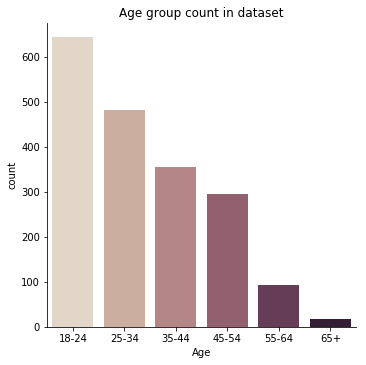

In [49]:
plot = sns.catplot(x="Age", kind="count", palette="ch:.25", data=drugs);

SetPlotTitle(plot, "Age group count in dataset")

#### As would be expected, we have a lot more young people responding to the survey as we have old people as young people would have a bigger chance of seeing and responding to a query

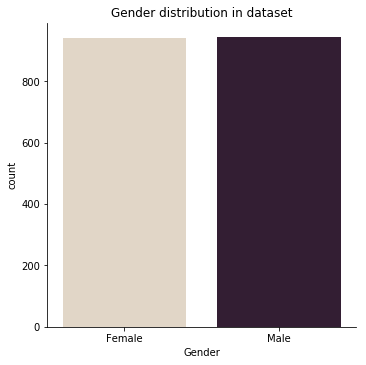

In [50]:
plot = sns.catplot(x="Gender", kind="count", palette="ch:.25", data=drugs);
SetPlotTitle(plot, "Gender distribution in dataset")

#### There are equal amounts of women and men in the dataset

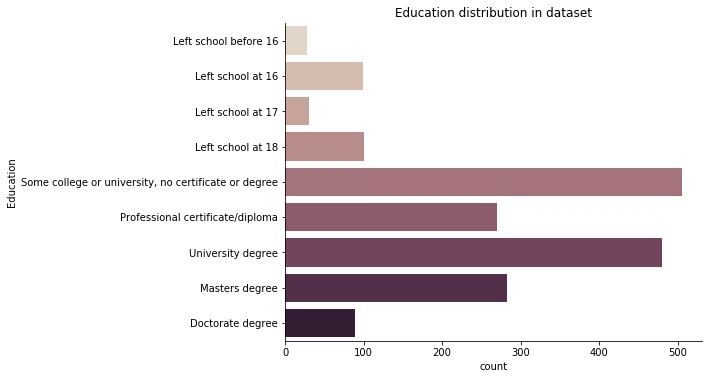

In [51]:
EducationOrder = ["Left school before 16","Left school at 16","Left school at 17",
                    "Left school at 18", "Some college or university, no certificate or degree", 
                    "Professional certificate/diploma", "University degree", "Masters degree","Doctorate degree"]
plot = sns.catplot(y="Education", kind="count", palette="ch:.25", aspect=2, data=drugs, order=EducationOrder);
SetPlotTitle(plot, "Education distribution in dataset")

#### There is a wide variety of different education levels given in this dataset. This will mean we can get more pertinent results.


### Make a pivot table to see the relation between Age and gender

In [52]:
tab = drugs.pivot_table(index=["Gender"], 
                         columns=["Age"],
                         values=["Ref"],
                         aggfunc="count",
                         fill_value=0)

In [53]:
tab.head()

Ref                            
Age    18-24 25-34 35-44 45-54 55-64 65+
Gender                                  
Female   237   294   202   158    43   8
Male     406   187   154   136    50  10

Text(0.5,1,'Heatmap representing the age in function of the Gender')

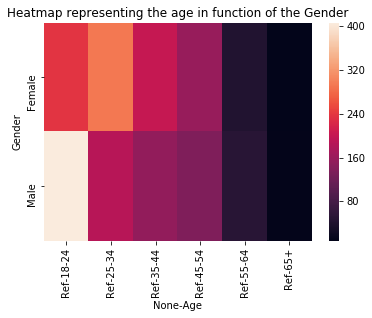

In [54]:
plot = sns.heatmap(tab)
plot.set_title("Heatmap representing the age in function of the Gender")

## Usage of each drug by age group

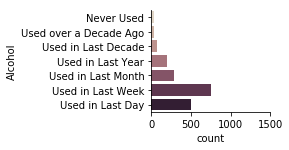

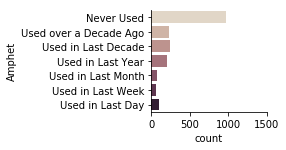

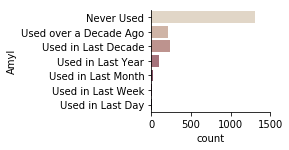

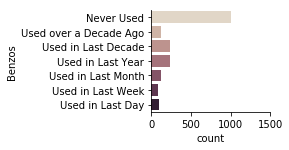

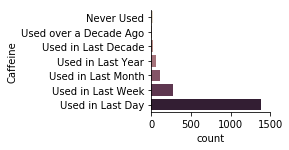

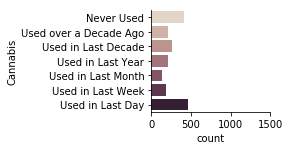

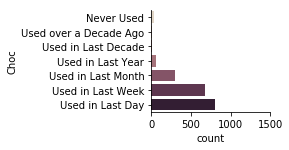

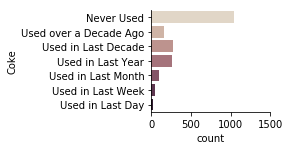

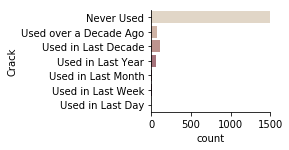

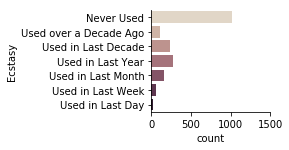

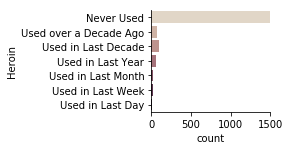

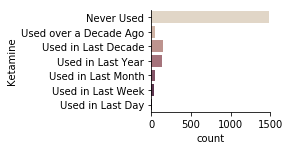

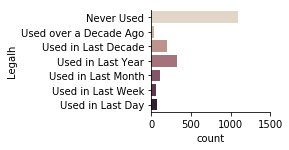

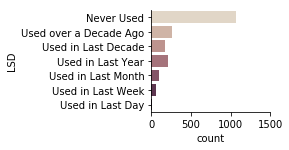

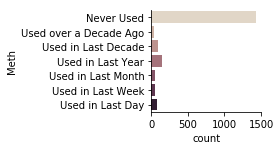

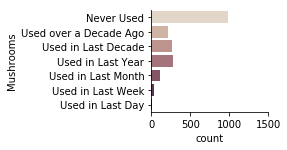

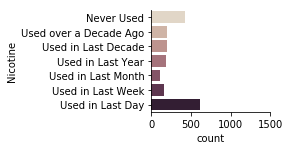

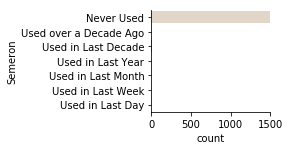

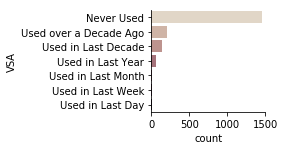

In [55]:
DrugUseOrder = ["Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", "Used in Last Day"]
for name in listOfDrugs:
    g = sns.catplot(y=name, kind="count", aspect=2, palette="ch:.25", height=2, data=drugs, order=DrugUseOrder);
    g.set(xlim=(0, 1500))

### The usages of the different drugs varies a lot from each drug 

In [56]:
PersonalityScore = ["Nscore",
"Escore",
"Oscore",    
"Ascore",    
"Cscore",    
"Impulsive",
"SS"]

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


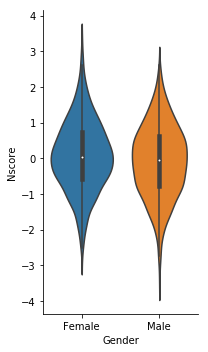

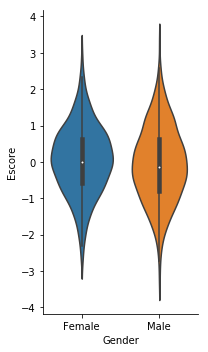

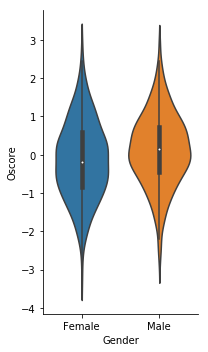

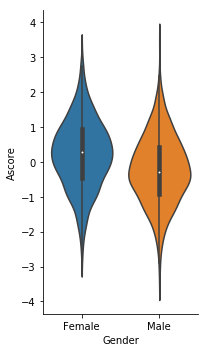

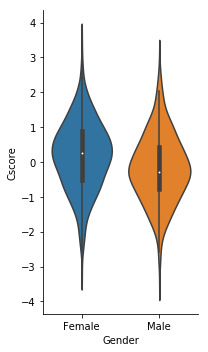

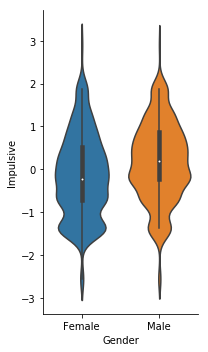

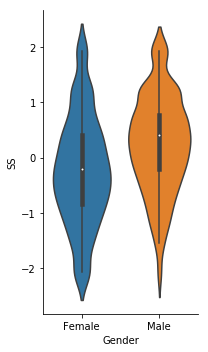

In [57]:
for score in PersonalityScore:
    sns.catplot(x="Gender", y=score, aspect=.6,
                kind="violin", data=drugs);

In [58]:
res = drugs.groupby(["Mushrooms", "Gender"])["Ref"].count()
res

Mushrooms               Gender
Never Used              Female    608
                        Male      374
Used in Last Day        Female      2
                        Male        2
Used in Last Decade     Female    111
                        Male      149
Used in Last Month      Female     27
                        Male       88
Used in Last Week       Female     12
                        Male       28
Used in Last Year       Female     79
                        Male      196
Used over a Decade Ago  Female    103
                        Male      106
Name: Ref, dtype: int64

In [59]:
tab = pd.pivot_table(drugs,
                     index=["Gender"],
                     values=["Ref"],
                     columns=["Mushrooms"],
                     aggfunc="count")
tab

Ref                                                          \
Mushrooms Never Used Used in Last Day Used in Last Decade Used in Last Month   
Gender                                                                         
Female           608                2                 111                 27   
Male             374                2                 149                 88   

                                                                      
Mushrooms Used in Last Week Used in Last Year Used over a Decade Ago  
Gender                                                                
Female                   12                79                    103  
Male                     28               196                    106

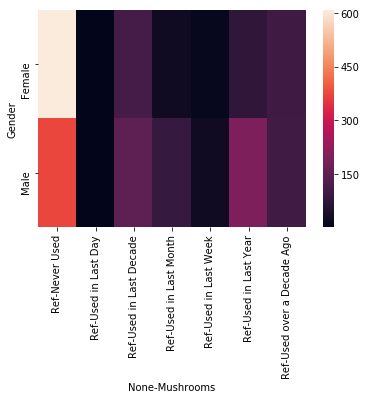

In [60]:
sns.heatmap(tab)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D4726066A0>,
      dtype=object)

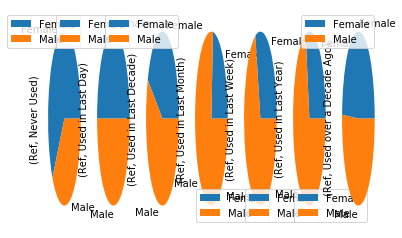

In [61]:
tab.plot.pie(subplots=True)

In [62]:
tab

Ref                                                          \
Mushrooms Never Used Used in Last Day Used in Last Decade Used in Last Month   
Gender                                                                         
Female           608                2                 111                 27   
Male             374                2                 149                 88   

                                                                      
Mushrooms Used in Last Week Used in Last Year Used over a Decade Ago  
Gender                                                                
Female                   12                79                    103  
Male                     28               196                    106

Text(0.5,1,'Consuption of Cannabis grouped by Male and Female')

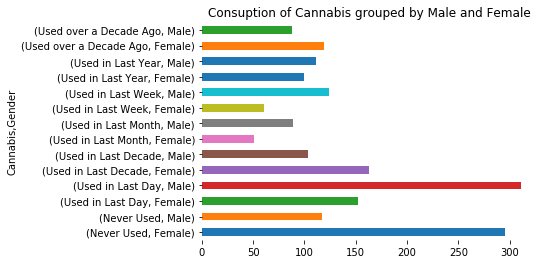

In [63]:
title = ""
to_plot = drugs.groupby(["Cannabis", "Gender"])["Ref"].count()
#barh : 
ax = to_plot.plot.barh(title=title)
despine_ax(ax)
ax.set_title("Consuption of Cannabis grouped by Male and Female")

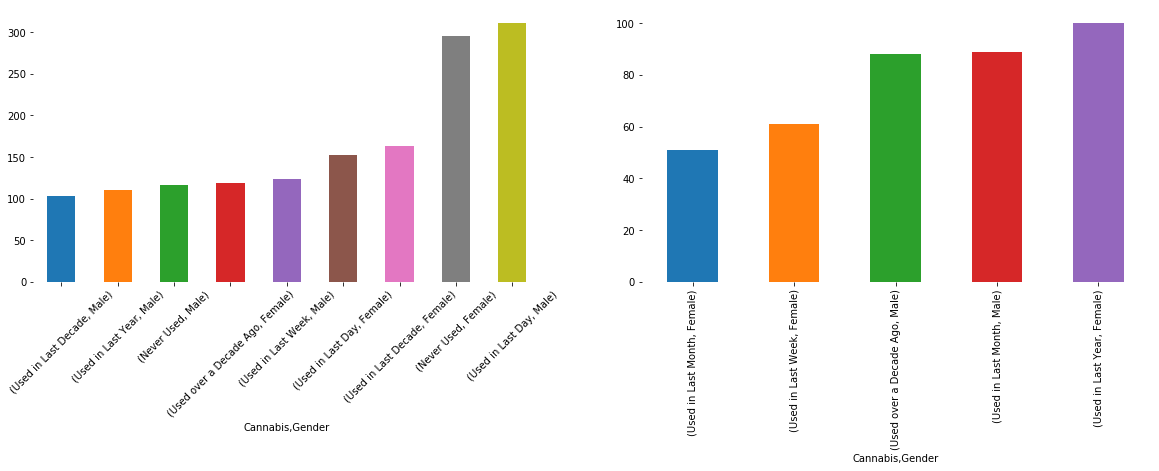

In [64]:
plt.figure(1, figsize=(20,5))

ax    = plt.subplot(121)
title = ""
to_plot.sort_values()[5:].plot.bar(title=title, rot=45, ax=ax)
despine_ax(ax)

ax    = plt.subplot(122)
title = ""
to_plot.sort_values()[:5].plot.bar(title=title, rot=90, ax=ax)
despine_ax(ax)

In [65]:
drugs.groupby(["Meth", "Gender"])["Ref"].count()

Meth                    Gender
Never Used              Female    789
                        Male      640
Used in Last Day        Female     20
                        Male       53
Used in Last Decade     Female     39
                        Male       58
Used in Last Month      Female     19
                        Male       31
Used in Last Week       Female     17
                        Male       31
Used in Last Year       Female     40
                        Male      109
Used over a Decade Ago  Female     18
                        Male       21
Name: Ref, dtype: int64

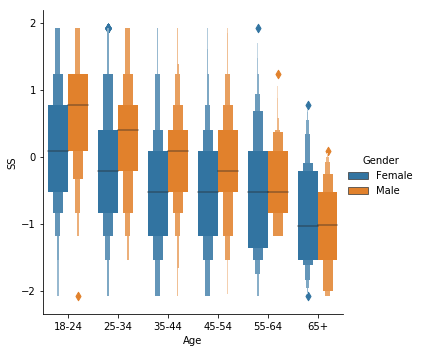

In [66]:
plot = sns.catplot(x="Age", y="SS", hue="Gender", kind="boxen", 
            data=drugs.sort_values("Age"));

We can see that the men in this dataset has a higher Sensation seeking level then the women. Even through the different age groups

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


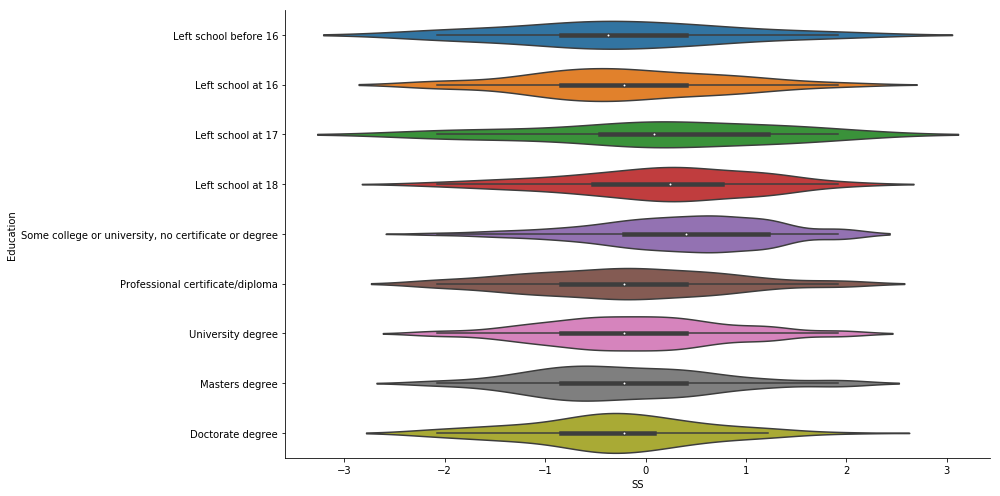

In [67]:
EducationOrder = ["Left school before 16","Left school at 16","Left school at 17",
                    "Left school at 18", "Some college or university, no certificate or degree", 
                    "Professional certificate/diploma", "University degree", "Masters degree","Doctorate degree"]
sns.catplot(x="SS", y="Education",
            kind="violin", aspect=2, height=7, order=EducationOrder, data=drugs);

We can think that the people with higher degrees are older and so they scored lower on the Sensation Seeking test

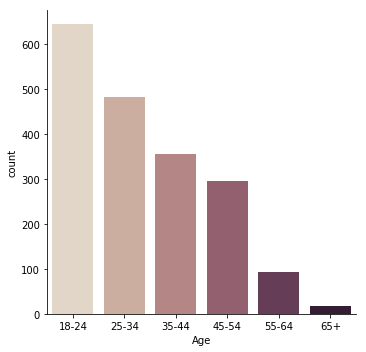

In [68]:
sns.catplot(x="Age", kind="count", palette="ch:.25", data=drugs);

In [69]:
methCount = drugs['Meth'].value_counts()
methCount

Never Used                1429
Used in Last Year          149
Used in Last Decade         97
Used in Last Day            73
Used in Last Month          50
Used in Last Week           48
Used over a Decade Ago      39
Name: Meth, dtype: int64

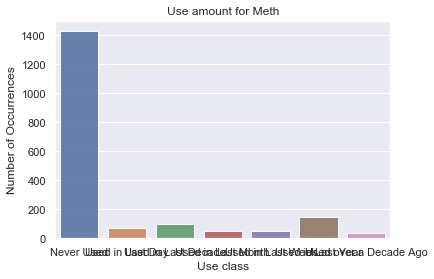

In [70]:
sns.set(style="darkgrid")
mathCount = methCount.sort_index()
sns.barplot(methCount.index, methCount.values, alpha=0.9)
plt.title('Use amount for Meth')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Use class', fontsize=12)
plt.show()

In [71]:
onlyCat_drugs = drugs.select_dtypes(include=['category']).copy()

In [72]:
onlyCat_drugs.head()

,Age,Gender,Education,Alcohol,Amphet,Amyl,Benzos,Caffeine,Cannabis,Choc,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semeron,VSA
0,35-44,Female,Professional certificate/diploma,Used in Last Week,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Day,Never Used,Used in Last Week,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
1,25-34,Male,Doctorate degree,Used in Last Week,Used in Last Decade,Used in Last Decade,Never Used,Used in Last Day,Used in Last Month,Used in Last Day,...,Used in Last Month,Never Used,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Year,Never Used,Used in Last Month,Never Used,Never Used
2,35-44,Male,Professional certificate/diploma,Used in Last Day,Never Used,Never Used,Never Used,Used in Last Day,Used in Last Year,Used in Last Month,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Never Used
3,18-24,Female,Masters degree,Used in Last Month,Never Used,Never Used,Used in Last Year,Used in Last Week,Used in Last Decade,Used in Last Month,...,Never Used,Never Used,Used in Last Decade,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
4,35-44,Female,Doctorate degree,Used in Last Month,Used over a Decade Ago,Used over a Decade Ago,Never Used,Used in Last Day,Used in Last Year,Used in Last Day,...,Used over a Decade Ago,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Used in Last Decade,Used in Last Decade,Never Used,Never Used


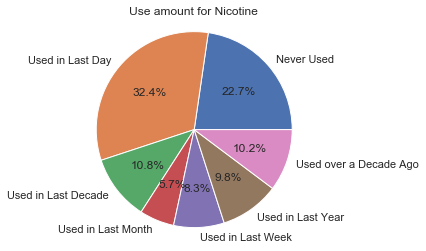

In [73]:
labels = onlyCat_drugs['Nicotine'].astype('category').cat.categories.tolist()
counts = onlyCat_drugs['Nicotine'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False) #autopct is show the % on plot
ax1.axis('equal')
plt.title('Use amount for Nicotine')
plt.show()

In [74]:
AlcoholUseSS = drugs.groupby(["Alcohol", "SS"])["Ref"].count()
AlcoholUseSS["Never Used"]

SS
-2.07848    1
-1.54858    7
-1.18084    5
-0.84637    3
-0.52593    5
-0.21575    4
 0.07987    4
 0.40148    1
 0.76540    2
 1.22470    1
 1.92173    1
Name: Ref, dtype: int64

### Chance of using Ketamine

In [75]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

## 2) Prepare the dataset for the learning

In [230]:
ketamineUseSerie = drugs.copy()
ketamineUseSerie = ketamineUseSerie.drop(columns=['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caffeine', 'Cannabis', 'Choc', 'Coke', 'Crack', 
                       'Ecstasy',  'Heroin', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semeron', 'VSA'])
ketamineUseSerie["User"] = ketamineUseSerie.Ketamine.apply(DrugUsageToInt)
ketamineUseSerie["Education"] = ketamineUseSerie.Education.apply(SetEducationToInt)
ketamineUseSerie["Gender"] = ketamineUseSerie.Gender.apply(SetGenderToInt)
ketamineUseSerie["Age"] = ketamineUseSerie.Age.map(AgeMapInt)
ketamineUseSerie = ketamineUseSerie.drop(columns=['Ketamine', 'Ref'])
ketamineUseSerie.sample(5)


,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,User
1392,1,1,6,0.96082,-0.31685,0.41667,-0.15487,-0.01928,0.76096,0.58489,-0.21712,-0.52593,0
1026,0,1,7,-0.57009,-0.31685,-0.34799,0.80523,0.58331,0.59042,1.30612,-0.21712,1.92173,0
988,0,0,4,-0.09765,-0.31685,0.31287,1.74091,0.29338,-0.76096,-1.78169,1.86203,1.92173,0
1473,1,0,5,0.24923,-0.31685,-0.34799,-0.43999,-0.17779,-0.45321,0.12331,-0.71126,-0.84637,0
112,1,1,6,0.96082,-0.31685,-1.19430,0.32197,0.88309,-1.21213,-0.78155,-0.21712,-0.21575,0


In [231]:
def RandomForest_grid_search(df, Y):
    """
    Réglage des hyper-paramètres du classifieur Random Forest
    """
    import sys, pickle
    from sklearn.ensemble          import RandomForestClassifier
    from sklearn                   import grid_search
    from sklearn.metrics           import make_scorer
    from sklearn.preprocessing     import label_binarize
    from sklearn.multiclass        import OneVsRestClassifier
    #grid search :

    parameters = {  "n_estimators"         : [ 10, 100, 200 ], 
                    "min_samples_leaf"     : [  3,   1,   7 ],
                    "criterion"            : ["gini"],#["gini", "entropy"]         ,
                    "max_features"         : ["auto"]      ,
                    "max_depth"            : [None]         , 
                    "n_jobs"               : [ -1]             ,  
                    "class_weight"         : ["auto"]          ,
                    "warm_start"           : [False]           }
    parameters = {  "n_estimators"         : [ 10], 
                    "min_samples_leaf"     : [  3 ],
                    "criterion"            : ["gini"],#["gini", "entropy"]         ,
                    "max_features"         : ["auto"]      ,
                    "max_depth"            : [None]         , 
                    "n_jobs"               : [ -1]             ,  
                    "class_weight"         : ["auto"]          ,
                    "warm_start"           : [False]           }
    
    grid_type = "RandomForestClassifier"
    
    print(grid_type) 
    sys.stdout.flush()
    """
        Search 
    """
    
    grid         = grid_search.GridSearchCV(RandomForestClassifier(), {})#, parameters, verbose=1, scoring='f1_weighted')
    
    try :grid.fit(df, Y)
    except Exception as e : print( "[%s - 2] : %s" + (grid_type,e))
    
    print (" best_score_ %s with =  %s "+( grid.best_score_,  grid.best_estimator_ ) )
    sys.stdout.flush()    
    return grid.best_estimator_

In [181]:
def svm_grid_search(df, Y):
    """
    Réglage des hyper-paramètres du classifieur Support Vector Machine
    Notamment : 'C', 'kernel' et 'gamma'
    """
    import sys
    from sklearn                   import grid_search
    from sklearn.svm               import SVC
    import pickle
    parameters = {  "C"              : [1.0],#, 0.5, 0.1, 2]                , 
                    "kernel"         : ['rbf'],#, 'poly', 'sigmoid']        ,
                    "degree"         : [2],#, 3, 4,5,6]                     , 
                    "gamma"          : [0.01],#, 0.1, 0.001, 0.5]           , 
                    "coef0"          : [0.0]                             , 
                    "shrinking"      : [True]                            , 
                    "probability"    : [True]                            , 
                    "tol"            : [0.001]                           , 
                    "cache_size"     : [10]                              , 
                    "class_weight"   : [None]                            , 
                    "verbose"        : [False]                           , 
                    "max_iter"       : [-1]                              , 
                    "random_state"   : [None]                            }
   
    
    
    print ("-"*30, "\n svm_grid_search")
    sys.stdout.flush()
    
    """
        Search Grid
    """
    grid    = grid_search.GridSearchCV(SVC(), parameters, verbose=0, scoring='f1_weighted')
    try :grid.fit(df, Y)
    except Exception as e : print( "[svm_grid_search - 2] : %s"%e) 
    print( "x_train, y_train : ", X_train, Y_train)

    print (" best_score_ = %.2f with =  %s "%(grid.best_score_, grid.best_estimator_ )) 
    sys.stdout.flush()    
    return grid.best_estimator_

In [182]:
def knn_grid_search(df, Y):
    """
    Réglage des hyper-paramètres du classifieur K Nearest Neighbors
    Plusieurs hyper-paramètres sont disponibles
    L'entrainement du modèle va s'effectuer sur plusieurs paramètres
    Le best_score représentera le modèle avec les meilleurs paramètres
    """
    import sys
    from sklearn                   import grid_search
    from sklearn.neighbors         import KNeighborsClassifier
    
    import pickle

    parameters = {  "n_neighbors"    : [2, 3, 5, 8 , 10]                         , 
                    "weights"         : ['uniform', 'distance']                  ,
                    "algorithm"      : ['auto', 'ball_tree', 'kd_tree', 'brute'] , 
                    "leaf_size"      : [1,3 ]                                    }
    
    
    grid_type = "knn_grid_search"
    print( "-"*30, "\n %s"%grid_type); sys.stdout.flush()
    """
        Search Grid
    """
    print (parameters);sys.stdout.flush()
    grid    = grid_search.GridSearchCV(KNeighborsClassifier(), parameters, verbose=0, scoring='f1_weighted')
    try :grid.fit(df, Y)
    except Exception as e : print ("Error : [%s - 2] : %s"%(grid_type,e)) ; return -1

    
    print (" best_score_ = %.2f with =  %s "%(grid.best_score_, grid.best_estimator_ ) ); sys.stdout.flush()    
    return grid

In [107]:
def clf_grid_search(df, Y):
    """
    Réglage des hyper-paramètres du Classifier Gradient Boosting
    """
    import sys
    from sklearn                   import grid_search
    from sklearn.neighbors         import KNeighborsClassifier
    from sklearn import ensemble
    from sklearn import datasets
    from sklearn.utils import shuffle
    from sklearn.metrics import mean_squared_error
    from sklearn.datasets import make_hastie_10_2
    from sklearn.ensemble import GradientBoostingClassifier
    
    import pickle

    parameters = {'n_estimators': 10                       ,
                  'max_depth': None                        ,
                  'min_samples_split': 2                   ,
                  'learning_rate': 0.01                    ,
                  'loss': 'ls'                             }
    
    grid_type = "clf_grid_search"
    print ("-"*30, "\n %s"%grid_type); sys.stdout.flush()
    """
        Search Grid
    """
    print (parameters);sys.stdout.flush()
    
    
    grid = grid_search.GridSearchCV(GradientBoostingClassifier(), {})
    try :grid.fit(df, Y)
    except Exception as e : print ("Error : [%s - 2] : %s"%(grid_type,e)) ; return -1
    print (" best_score_ = %.2f with =  %s "%(grid.best_score_, grid.best_estimator_ ) ); sys.stdout.flush()    
    return grid

## 3) Create the training and test datasets

In [232]:
y = ketamineUseSerie["User"]
x = ketamineUseSerie.copy()
x = x.drop(columns=["User"])
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)
Y_train.head()

706     3
149     0
184     0
1139    1
1465    0
Name: User, dtype: category
Categories (7, int64): [0, 6, 2, 4, 5, 3, 1]

## Prediction with SVM

In [293]:

nb_lignes = 1000
start_time = print_time()

# Apprentissage du classifieur SVM sur X_train et Y_train (<nb_lignes> données)
svm = svm_grid_search(X_train[:nb_lignes], Y_train[:nb_lignes].get_values())

end_time = print_time()
print ("\nDuration time :", end_time - start_time)

------------------------------ 
 svm_grid_search


D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:553: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


x_train, y_train :        Age Gender Education  Country  Ethnicity   Nscore   Escore   Oscore  \
706     0      0         4  0.96082   -0.31685  0.41667 -0.57545 -0.45174   
149     3      1         6  0.96082   -0.31685 -0.79151  1.93886 -0.71727   
184     4      0         3  0.96082   -0.31685  0.04257 -0.80615 -0.97631   
1139    2      0         5 -0.57009   -0.31685  0.41667 -1.23177  0.14143   
1465    1      1         7  0.96082   -0.31685 -0.14882 -0.80615 -1.27553   
167     1      1         5  0.96082   -1.10702  0.04257  0.00332 -0.97631   
972     0      0         4 -0.57009   -0.31685  1.23461  0.00332  1.06238   
538     3      0         7  0.96082   -0.31685 -1.32828  1.28610 -0.17779   
1742    1      1         1  0.96082   -0.31685 -1.86962  0.96248 -0.97631   
561     2      1         7  0.96082    0.11440  2.61139  0.47617 -1.55521   
895     1      0         7 -0.57009   -0.31685 -0.79151  1.11406 -0.17779   
382     3      1         6  0.96082   -0.31685  0.13606 

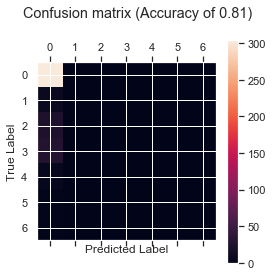

In [298]:
draw_confusion_matrix(Y_test, svm.predict(X_test), "") #Y_test possède seulement la variable 'bucket_en_entier'.

## Prediction using KNN

In [300]:
#30 rows  : 4.39s / 0.42 acc
nb_ligne = 30
start_time = print_time()

# Apprentissage du classifieur KNN sur X_train et Y_train (<nb_lignes> données)
knn = knn_grid_search(X_train[:nb_ligne], Y_train[:nb_ligne].get_values())


end_time = print_time()
print ("\nDuration time :", end_time - start_time)


------------------------------ 
 knn_grid_search
{'n_neighbors': [2, 3, 5, 8, 10], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': [1, 3]}


D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:553: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarni

 best_score_ = 0.63 with =  KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform') 

Duration time : 0.953449010848999


D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-def

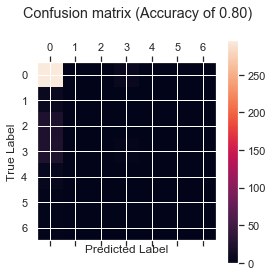

In [301]:
# Matrice de confusion des données X_test sur lesquelles on fait la prédiction et des données Y_test.
# The accuracy remains quite high but we still don't have a good diagonal line

draw_confusion_matrix(Y_test, knn.predict(X_test), "") 

## Prediction with CLF

In [302]:
#30 rows  : 2.53s / 0.42 acc
#200 rows  : 2.53s / 0.42 acc
nb_ligne = 500
start_time = print_time()

# Apprentissage du classifieur CLF sur X_train et Y_train (<nb_lignes> données)
clf = clf_grid_search(X_train[:nb_ligne], Y_train[:nb_ligne].get_values())


end_time = print_time()
print ("\nDuration time :", end_time - start_time)


------------------------------ 
 clf_grid_search
{'n_estimators': 10, 'max_depth': None, 'min_samples_split': 2, 'learning_rate': 0.01, 'loss': 'ls'}


D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:553: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)


 best_score_ = 0.76 with =  GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False) 

Duration time : 1.878006935119629


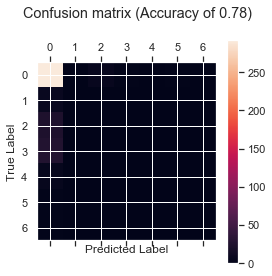

In [303]:
# CLF seems to predict in a more uniform mannern we have some color on the side and the top
draw_confusion_matrix(Y_test, clf.predict(X_test), "")

## 4) Standardise the data values

In [205]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)                 # Il ne faut fiter que sur les data d'entrainement
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)  # apply same transformation to test data

In [206]:
print (X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(1508, 12) (1508,)
(377, 12) (377,)


## 5) Choose an algorithm and test it

In [209]:
from sklearn import svm
svr = svm.SVR(kernel='linear')

from sklearn import cross_validation
cross_validation.cross_val_score(svr, ketamineUseSerie, y, n_jobs=-1)

array([0.99740586, 0.99706202, 0.99715527])

## 6) Optimising the hyperparameters with Grid search

In [210]:
from sklearn import cross_validation
from sklearn import grid_search

parameters = {  'gamma' : [0.01, 0.1, 0.5] }
grid       = grid_search.GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)

-0.07248681188237971 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


## 7) Refine the grid search

In [211]:
parameters = {  'C'      : [0.5, 1, 1.5]             ,
                'gamma'  : [0.5, 0.1, 0.15]      }
grid = grid_search.GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_score_, grid.best_estimator_)

-0.022917286008285815 SVR(C=0.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.5,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [49]:
parameters = {  'C'      : [1.5, 2, 2.5]   ,
                'kernel' : ['rbf', 'poly', 'sigmoid'],
                'gamma'  : [ 0.05, 0.10, 0.15] }
grid = grid_search.GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_score_, grid.best_estimator_)


0.9967726343707184 SVR(C=1.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.05,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [50]:
parameters = {  'C'       : [2.5, 3, 4]   ,
                'kernel'  : ['rbf', 'poly', 'sigmoid'],
                'gamma'   : [ 0.01, 0.05, 0.07],
                 "degree" : [1,3,5]}
grid = grid_search.GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)

0.9985607002742415 SVR(C=4, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


## 7) Linear regression

In [225]:
lm = linear_model.LinearRegression()
#lm = linear_model.Ridge(alpha=0.2) # 0.099
#lm = linear_model.Lasso(alpha=0.2) # 0.04
#lm = linear_model.LassoLars(alpha=1)

model = lm.fit(X_train, Y_train)
predictions = lm.predict(X_test)

Text(0,0.5,'Predictions')

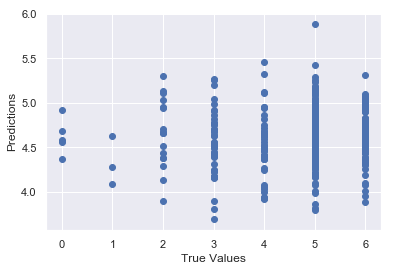

In [226]:
plt.scatter(Y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [227]:
print ("Score:", model.score(X_test, Y_test))

Score: -1.686908851006308e-05


In [149]:
sortedDrugs = drugs.sort_values("SS")

In [150]:
import matplotlib.ticker as ticker
sortedDrugs = pd.concat([sortedDrugs.Ref, sortedDrugs.SS, sortedDrugs.Gender], axis=1)
tab = sortedDrugs.pivot_table(index=["Gender"], 
                         columns=["SS"],
                         values=["SS"],
                         aggfunc="count",
                         fill_value=0)
tab

Ref                                                        \
SS     -2.07848 -1.54858 -1.18084 -0.84637 -0.52593 -0.21575  0.07987   
Gender                                                                  
Female       59       62       83      108      127      119       96   
Male         12       25       49       61       84      104      123   

                                            
SS      0.40148  0.76540  1.22470  1.92173  
Gender                                      
Female      102       67       76       43  
Male        147      144      134       60

## Sensation seeker level in function of usage level

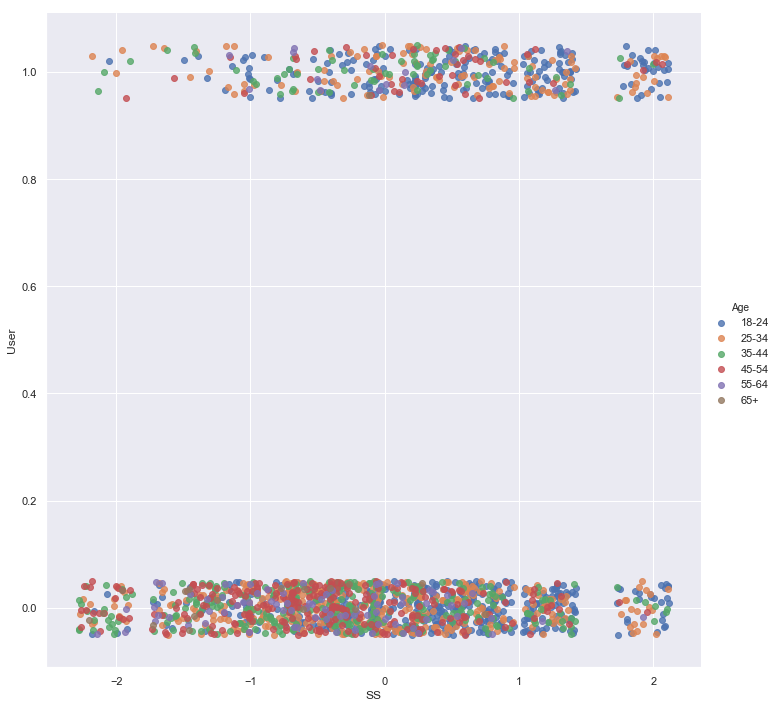

In [151]:
scatterPlot = pd.concat([drugs.Age, drugs.Gender, drugs.SS, drugs.Meth], axis=1)
scatterPlot["User"] = scatterPlot.Meth.apply(IsUser)
scatterPlot["User"] = scatterPlot["User"].astype("int64")

sns.lmplot( x="SS", y="User", data=scatterPlot, fit_reg=False, hue='Age', legend=True, x_jitter=0.2, y_jitter=0.05, height=10)

We can see that the most Meth users fall into the high SS ratings. This is in no way conclusive because the spread is quite uniform over the usage amount
We can also see that most of the non users are either old or really young

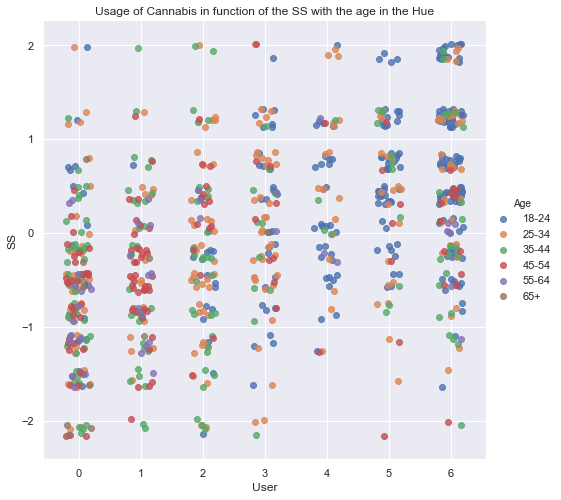

In [275]:
scatterPlot = pd.concat([drugs.Age, drugs.Gender, drugs.SS, drugs.Cannabis, drugs.Country.map(countryMeaning)], axis=1)
scatterPlot["User"] = scatterPlot.Cannabis.apply(DrugUsageToInt)
scatterPlot["User"] = scatterPlot["User"].astype("int64")

g = sns.lmplot( x="User", y="SS", data=scatterPlot.sample(800), fit_reg=False, hue='Age', legend=True, x_jitter=0.2, y_jitter=0.1, height=7)
SetPlotTitle(g, "Usage of Cannabis in function of the SS with the age in the Hue")

#### We can see that people who are more sensation seeking are more likily to use Cannabis. 

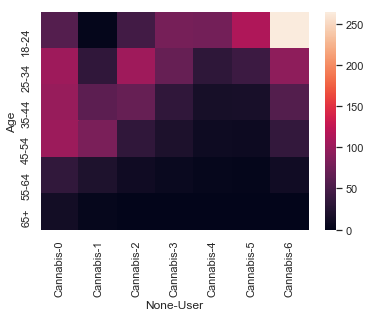

In [277]:
tab = scatterPlot.pivot_table(index=["Age"], 
                         columns=["User"],
                         values=["Cannabis"],
                         aggfunc="count",
                         fill_value=0)
sns.heatmap(tab)

From these 2 graphs, we can see that the number of alcohol users are very high for people having drank in the last decade, which is worrying as they are all 24 and under and they would be like 10 when they drank the alcohol...


## Is a user of one type of drug more likely to use another

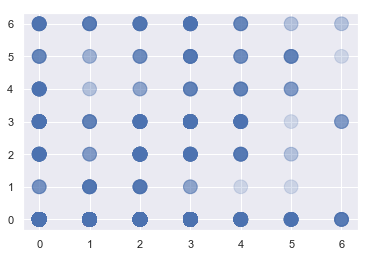

In [279]:
scatterPlot = pd.concat([drugs.Meth, drugs.Coke, drugs.Crack, drugs.Gender], axis=1)
scatterPlot["CokeUser"] = scatterPlot.Coke.apply(DrugUsageToInt)
scatterPlot["MethUser"] = scatterPlot.Meth.apply(DrugUsageToInt)
scatterPlot["CrackUser"] = scatterPlot.Crack.apply(DrugUsageToInt)
scatterPlot["CokeUser"] = scatterPlot["CokeUser"].astype("int64")
scatterPlot["MethUser"] = scatterPlot["MethUser"].astype("int64")
scatterPlot["CrackUser"] = scatterPlot["CrackUser"].astype("int64")

plt.scatter(scatterPlot.CokeUser, scatterPlot.MethUser, alpha=0.2, s=scatterPlot.count()/10)

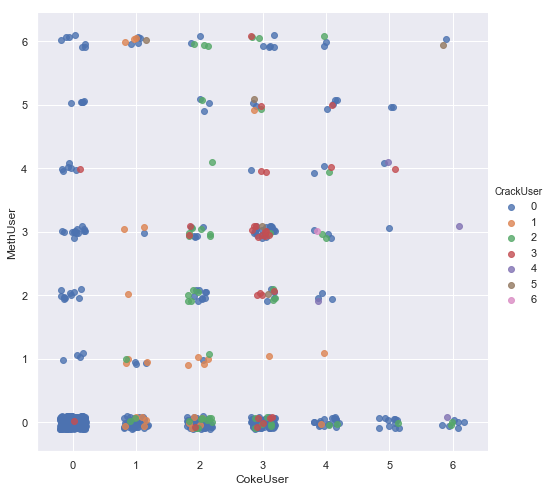

In [282]:
sns.lmplot( x="CokeUser", y="MethUser", data=scatterPlot.sample(900), fit_reg=False, hue='CrackUser', legend=True, x_jitter=0.2, y_jitter=0.1, height=7)

Interestingly enough, we can see that if you have used one of these drugs in the last year, a bunch of people tried the others too as we can see in the center

## Let us take a look at the education and how it affects drug use

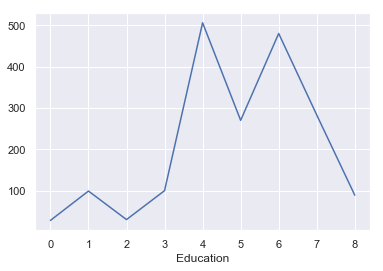

In [242]:
educationFrame = pd.concat([drugs.Education.apply(SetEducationToInt), 
                            drugs.Gender.apply(SetGenderToInt), 
                            drugs.Coke.apply(DrugUsageToInt),
                            drugs.Cannabis.apply(DrugUsageToInt).sort_index(),
                            drugs.Age
                            ], axis=1)
educationFrame["Education"] = educationFrame["Education"].astype("int64")
educationFrame["Gender"] = educationFrame["Gender"].astype("int64")
educationFrame["Coke"] = educationFrame["Coke"].astype("int64")
educationFrame["Cannabis"] = educationFrame["Cannabis"].astype("int64")

eduCount = educationFrame.groupby('Education')['Gender'].apply(lambda x: x.count())
eduCount = eduCount.sort_index()
eduCount.plot()

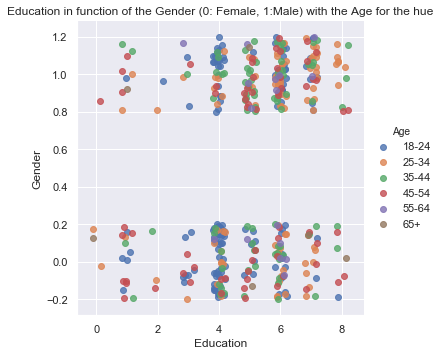

In [253]:
g = sns.lmplot( x="Education", y="Gender", hue="Age", data=educationFrame.sample(400), fit_reg=False, legend=True, x_jitter=0.2, y_jitter=0.2, height=5)
SetPlotTitle(g, "Education in function of the Gender (0: Female, 1:Male) with the Age for the hue")

We can see that for the most part, we have people a lot of people who have gone to university but dropped out and a lot of people with a university degree

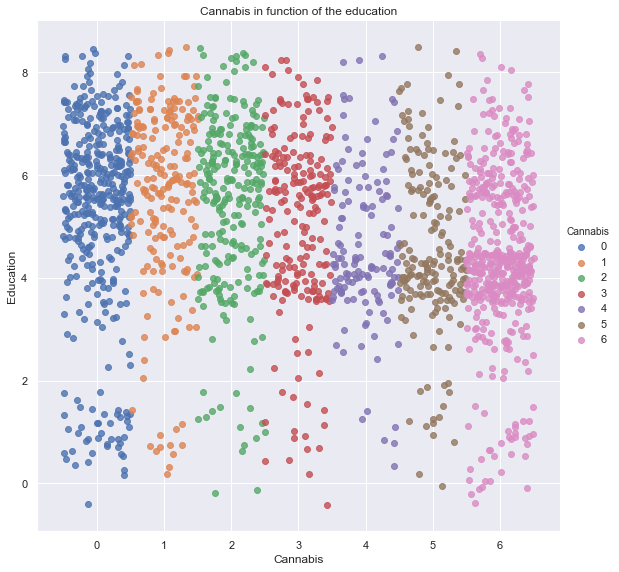

In [258]:
g = sns.lmplot( y="Education", x="Cannabis", data=educationFrame, fit_reg=False, hue="Cannabis", 
               legend=True, x_jitter=0.5, y_jitter=0.5, height=8)
SetPlotTitle(g, "Cannabis in function of the education")

We can see that the heaviest users of cannabis is in the higher education level. We could hypotisize that the higher stress from work or studies could push people to smoke more cannabis.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D08615ACF8>,
      dtype=object)

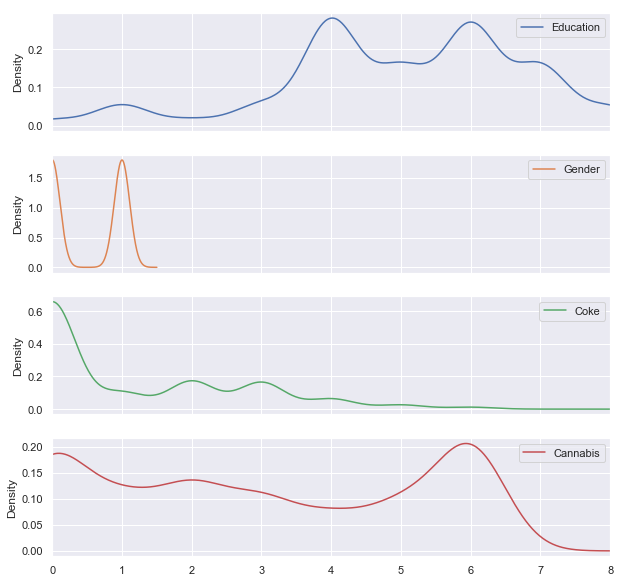

In [160]:
educationFrame.plot(kind="kde",figsize=(10,10), subplots=True, xlim=(0, 8))

When we look at the densities, we can see that we have very few people who have used coke and a lot more who have used Cannabis and who use on a regular basis. This explains why we see so much pink to the right on the previous graph. We can also see from the education density that most poeple have a some kind of collage experiance.

## All drug usage counted together

In [284]:
allOverDrugUsage = pd.concat([drugs.Ecstasy.apply(IsUser),
                             drugs.Crack.apply(IsUser),
                             drugs.VSA.apply(IsUser),
                             drugs.Nicotine.apply(IsUser),
                             drugs.Mushrooms.apply(IsUser),
                             drugs.Meth.apply(IsUser),
                             drugs.LSD.apply(IsUser),
                             drugs.Ketamine.apply(IsUser),
                             drugs.Heroin.apply(IsUser),
                             drugs.Coke.apply(IsUser),
                             drugs.Choc.apply(IsUser),
                             drugs.Cannabis.apply(IsUser),
                             drugs.Caffeine.apply(IsUser),
                             drugs.Benzos.apply(IsUser),
                             drugs.Amyl.apply(IsUser),
                             drugs.Amphet.apply(IsUser),
                             drugs.Alcohol.apply(IsUser)], axis=1)
allOverDrugUsage["SumUsage"] = allOverDrugUsage.sum(axis=1)
allOverDrugUsage["Gender"] = drugs.Gender.apply(SetGenderToInt)
allOverDrugUsage["Education"] = drugs.Education.apply(SetEducationToInt)
allOverDrugUsage["Age"] = drugs.Age
allOverDrugUsage["SumUsage"] = allOverDrugUsage["SumUsage"].astype("int64")
allOverDrugUsage["Gender"] = allOverDrugUsage["Gender"].astype("int64")
allOverDrugUsage.sample(10)

,Ecstasy,Crack,VSA,Nicotine,Mushrooms,Meth,LSD,Ketamine,Heroin,Coke,...,Cannabis,Caffeine,Benzos,Amyl,Amphet,Alcohol,SumUsage,Gender,Education,Age
1782,0,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,1,5,1,7,25-34
808,1,0,1,0,1,0,1,1,0,0,...,1,1,0,0,0,1,9,0,3,18-24
1649,0,0,1,1,1,0,1,0,1,1,...,1,1,1,0,0,1,11,0,6,18-24
203,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,4,0,0,65+
498,1,1,0,1,1,1,1,0,1,1,...,1,1,1,1,1,1,15,1,4,55-64
564,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,4,1,7,45-54
35,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,4,0,0,65+
671,1,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,1,6,1,4,18-24
961,1,0,0,1,1,0,1,0,0,0,...,1,1,0,0,1,1,9,0,4,18-24
1829,0,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,1,5,0,6,18-24


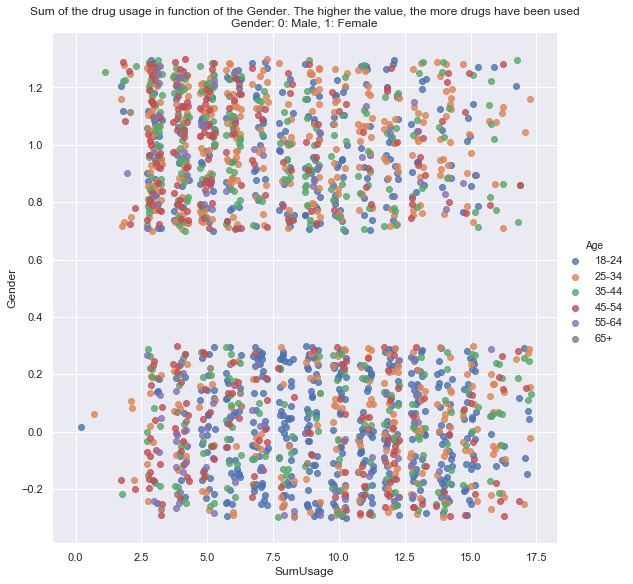

In [288]:
g = sns.lmplot( y="Gender", x="SumUsage", hue="Age", data=allOverDrugUsage, fit_reg=False, markers='o', legend=True, x_jitter=0.3, y_jitter=0.3, height=8)
#g.set_yticklabels(["Male", "Female"])
SetPlotTitle(g, "Sum of the drug usage in function of the Gender. The higher the value, the more drugs have been used\nGender: 0: Male, 1: Female")

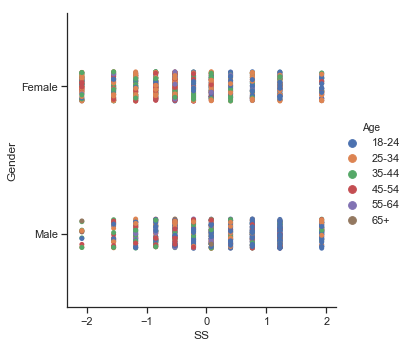

In [163]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="SS", y="Gender", hue="Age", data=drugs);

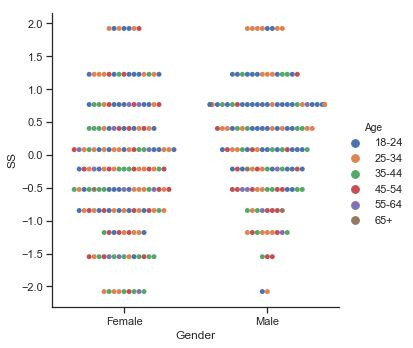

In [164]:
 sns.catplot(x="Gender", y="SS", hue="Age", kind="swarm", data=drugs.sample(300));

## Drug consumption around the world

In [290]:
drugs.Country[132]
countryDrugUse = pd.concat([drugs.Gender, drugs.Country.map(countryMeaning), drugs.Age, drugs.Education.apply(SetEducationToInt), drugs.SS], axis=1)
countryDrugUse.sample(10)

,Gender,Country,Age,Education,SS
1481,Male,USA,35-44,5,-0.84637
137,Female,UK,45-54,6,-1.18084
1485,Male,Australia,18-24,6,-0.52593
497,Male,Other,25-34,1,0.07987
1780,Female,UK,25-34,4,1.92173
674,Male,UK,18-24,5,0.76540
1217,Female,Other,18-24,4,0.76540
1677,Female,UK,18-24,6,-0.52593
565,Female,UK,18-24,6,-1.18084
51,Male,Canada,45-54,5,1.92173


AttributeError: 'AxesSubplot' object has no attribute 'flatten'

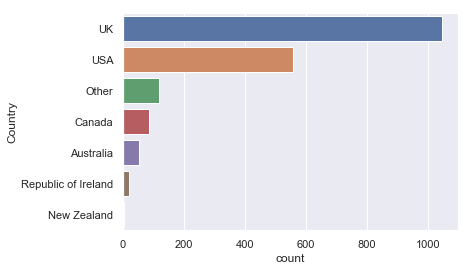

In [291]:
g = sns.countplot(y = 'Country',
              data = countryDrugUse,
              order = countryDrugUse['Country'].value_counts().index)
SetPlotTitle(g, "")

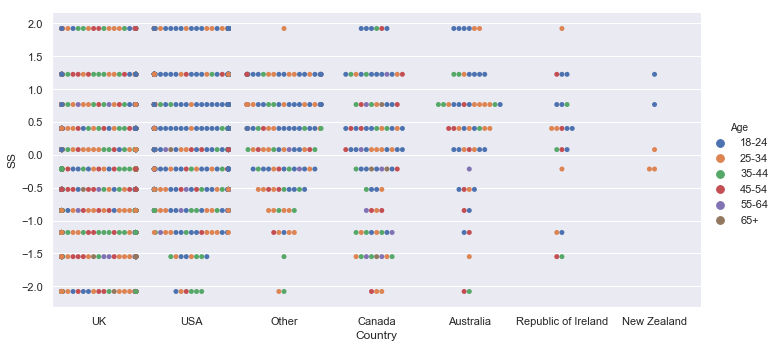

In [140]:
 sns.catplot(x="Country", y="SS", hue="Age", kind="swarm", data=countryDrugUse, 
                 aspect=2, order = countryDrugUse['Country'].value_counts().index);

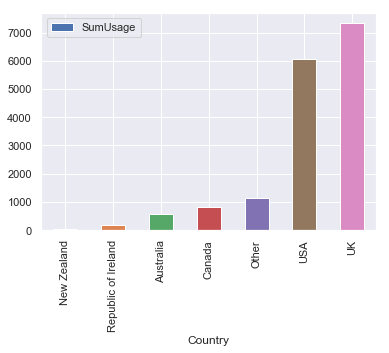

In [177]:
allOverDrugUsage["Country"] = countryDrugUse["Country"]
allOverDrugUsage["Ref"] = drugs.Ref
allOverDrugUsage.groupby(["Country"])["SumUsage"].sum().sort_values().plot(legend=True, kind="bar")